# Project 2

## GENERAL INSTRUCTIONS:

**this is NOT a group project**
- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---


# DONUTS

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv),

- **a)** make 3 scatterplots using ggplot to show:
    - `Sodium_100g` vs `Total_Fat_100g`
    - `Sodium_100g` vs. `Sugar_100g`
    - `Sugar_100g` vs `Total_Fat_100g`
    
    
    
- **b)** Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**). (*IN A MARKDOWN CELL*)

Please note that for this assignment, "It's easier to code" or "it's comuptationally efficient" does not count as a valid reason. The reasons should be based on the algorithms/data.


(Please use "\*\*" to make any mention of one of the algorithms bold in your discussion. For example "I think \*\*DBSCAN\*\* is the best algorithm ever!" will make the word "DBSCAN" bold in a Markdown cell).

- **c)** **Implement the algorithm** you think will work best here using the 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (*IN A MARKDOWN CELL*)



- **d)** **Thouroughly discuss the performance** of your clustering model. 
    - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
    - how did your model perform? (*IN A MARKDOWN CELL*)
    - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)



- **e)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
    - explain why you chose this variable. (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)
    
    
    
Note: The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [1]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# data
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")

data.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


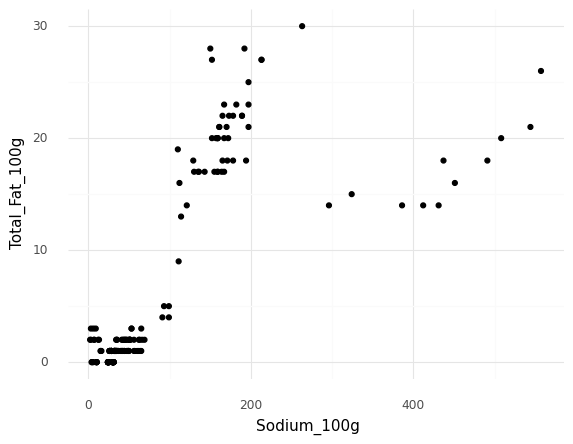

<ggplot: (8773512051923)>

In [3]:
#a

# Sodium_100g vs Total_Fat_100g
ggplot(data, aes(x = "Sodium_100g", y = "Total_Fat_100g")) + geom_point() + theme_minimal()

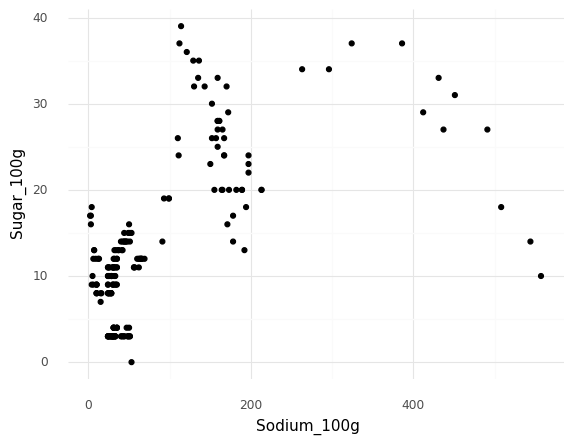

<ggplot: (8773512271053)>

In [4]:
# a

# Sodium_100g vs. Sugar_100g
ggplot(data, aes(x = "Sodium_100g", y = "Sugar_100g")) + geom_point() + theme_minimal()


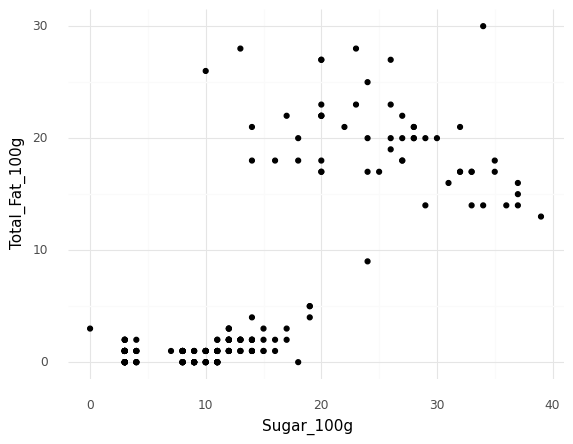

<ggplot: (8773512283995)>

In [5]:
#a 

# Sugar_100g vs Total_Fat_100g
ggplot(data, aes(x = "Sugar_100g", y = "Total_Fat_100g")) + geom_point() + theme_minimal()


### b) Using the scatterplots from part a as well as the donuts dataset, thouroughly discuss which clustering method (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) you think would be best for this data and WHY. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (mention each of the 4 algorithms at least once). (IN A MARKDOWN CELL)

Based on only the scatterplots of the data, it looks like the data can be broken up into three main clusters. These three distinct clusters are definitely more easy to see in the first two data plots, and the third plot shows something more similar to two clusters, one dense and one way less dense. We also see in the first two scatter plots that the three clusters all vary in density and thus while they may have pretty decent separation, their cohesion varies and thus this data may not be suitable for DBSCAN right off the bat. 

**K-Means:** One of the main cons of using K-Means with this data is the assumption that clusters are spherical. Again, looking at the scatterplot we can see that this assumption would probably be broken which would lead us to missing some of the patterns in the clusters. K-Means also forces all the data points into a cluster, so some of the points that look like noise and do not necessarily fit as well into a cluster would forced into one, which would ultimately affect the silhouette score.

**Gaussian Mixture Models (w/ EM):** With GMM, we do not have the same hard assignment and spherical data assumption that we have with K-Means. Thus, more of the patterns in the clusters could be seen with this model. Like K-Means, GMM also force points into being a part of a cluster, creating the same problem mentioned above. However, the advantage this algorithm has over DBSCAN is that it does not require the clusters to have similar density, making it a very good option to use for this data and personally what I would pick to model it.

**DBSCAN:** While DBSCAN is good to use for irregular shaped clusters, we generally need to have clusters with similar densities, which could be a problem when looking at this data. In the first two plots, we see that all three clusters vary in densities: one cluster is very dense, the next slightly less dense, and the third is not very dense at all (respectively from left to right). In the second data plot, we would have the same issue as the bottom cluster is much denser than the top left cluster. DBSCAN also faces trouble with data that may have overlapping or touching clusters. This doesn't seem like it would be too much of a problem for this data set (at least for the top two plots) as each cluster seems to have a decent amount of separation from each other. However, this is harder to see in the last plot.  

**Hierarchicial Clustering:** One of the advantages of HAC is the amount of variation it allows in how we measure distance between data points as well as how it models the relationships between our clusters and how similar they are with each other. A problem we may face is that we cannot un-merge the clusters we have created, once we have created them. For example, for points in the middle left regions of the first and second plot that could fit into either of the clusters, we could find that if we iteratively went through the models and reclustered, the point may actually fit better into the other cluster. However, we would have to settle for the suboptimal first clustering that we identified that point in initially since we are unable to unmerge the clusters. We also know that hierarchicial clustering does not work as well on a very large data set.

### c) Implement the algorithm you think will work best here using the 3 variables Sodium_100g, Total_Fat_100g and Sugar_100g, and describe how you chose any hyperparameters (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. 

I chose to implement the Gaussian Mixtures model and chose n_components by looking at the plot for the data. For the first two graphs, it is easier to see three clusters and so I tested the model with different n_component values and found that 3 clusters did indeed preform the best.

In [6]:
# c

variables = ["Sodium_100g", "Sugar_100g", "Total_Fat_100g"]

# z-score 
z = StandardScaler()
data[variables] = z.fit_transform(data[variables])

# build the model with the number of clusters we want and fit the data
EM = GaussianMixture(n_components = 3)
EM.fit(data[variables])

# get the most likely cluster for each data point
cluster = EM.predict(data[variables])


print("GM Silhouette Score: ", silhouette_score(data[variables], cluster))

# adding cluster membership to the data frame since ggplot needs it
data["cluster"] = cluster


GM Silhouette Score:  0.7406259709460558


#### d) Thouroughly discuss the performance of your clustering model.
   - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
   - how did your model perform? (*IN A MARKDOWN CELL*)
   - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)
   
**To assess my model I reviewed the silhouette score outputted. The silhouette score for my model is 0.7406259709460558, so the model did preformed pretty well!** 


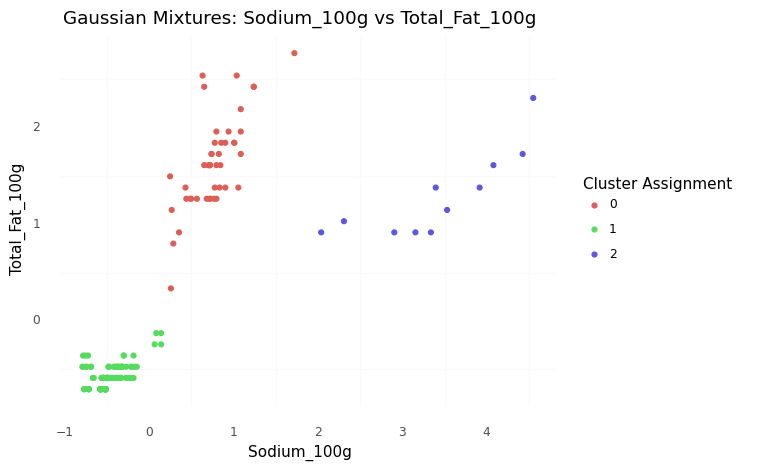

<ggplot: (8773512310878)>


In [7]:
# d1

# Sodium_100g vs Total_Fat_100g
print(ggplot(data, aes(x = "Sodium_100g", y = "Total_Fat_100g",
                    color = "factor(cluster)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures: Sodium_100g vs Total_Fat_100g"))

#### d1) The clusters for this model are relatively distinct with the exception maybe of the red and green cluster. The green cluster has the lowest sodium and fat, thus this could be the "healthy" donut. The red cluster has a little big higher fat but generally still low on sodium at least compared to the blue cluster, so we'll call this the "keto" donut. The blue cluster has both higher total fat (similar to that of the red cluster) but is also high in sodium, so maybe these are the maple bacon donuts??

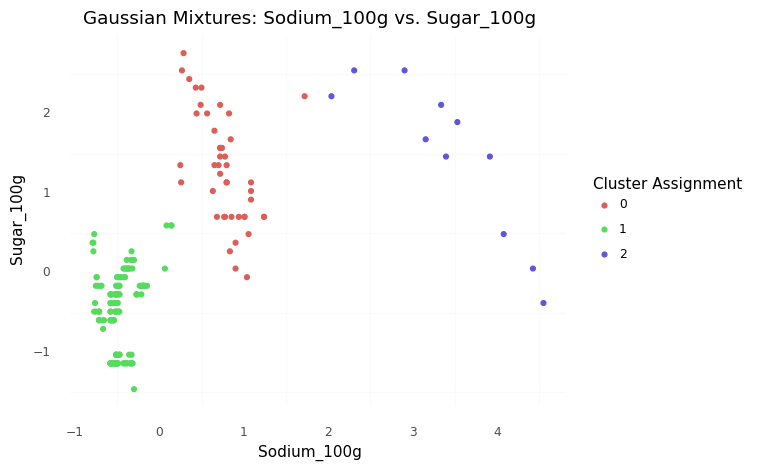

<ggplot: (8773512306535)>


In [8]:
# d2

# Sodium_100g vs. Sugar_100g
print(ggplot(data, aes(x = "Sodium_100g", y = "Sugar_100g",
                    color = "factor(cluster)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures: Sodium_100g vs. Sugar_100g"))

#### d2) the green cluster is on the lowest side for sugar and sodium, so for this matching again, the green cluster is the healthiest donut. The red cluster is high in sugar but less so, more moderate in sodium so maybe these are the jelly filled donuts. The last cluster, the blue cluster, is highest in sodium and is generally still medium to high in sugar so thus these are the same maple bacon donuts we had as before in the above plot.

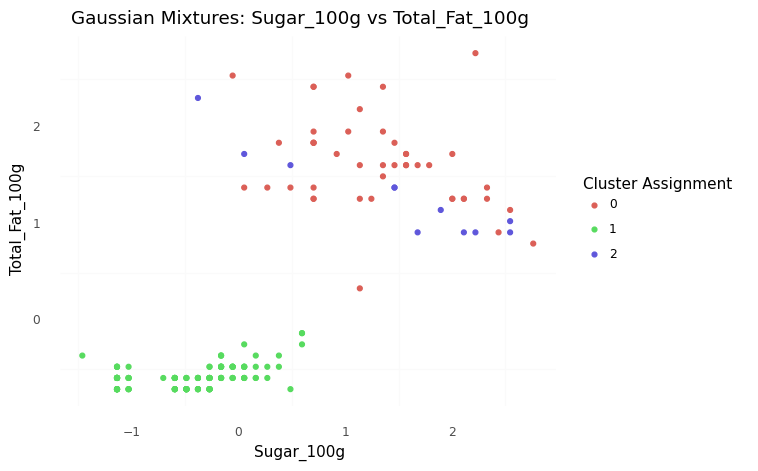

<ggplot: (8773512480229)>


In [9]:
# d3 

# Sugar_100g vs Total_Fat_100g
print(ggplot(data, aes(x = "Sugar_100g", y = "Total_Fat_100g",
                    color = "factor(cluster)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures: Sugar_100g vs Total_Fat_100g"))

#### d3) Again, the green cluster contains the healthiest donuts with the lowest total fat and lowest sugar content. The other two clusters are sort of mixed in with each other and could even count as a singular cluster. These clusters (blue and red) are less dense and have higher total fat and higher sugar, we'll call these the "rest" of the donuts, or just all the regular donuts that aren't specifically made to be healthy. 

- **e)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
    - explain why you chose this variable. (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)
    
**I chose the `Cholesterol_100g` variable as it improved the clustering of my model the most. I tested this by adding each of the variables one by one to see which gave me the highest silhouette score upon the first run. I also excluded the variables that had null elements included in their frame. The addition of this variable did not improve the fit of the clustering in the model as the silhouette score with this variable included is just slightly below that of the model without it included in part c.**

In [12]:
# e

moreVariables = ["Sodium_100g", "Sugar_100g", "Total_Fat_100g", "Cholesterol_100g"]

# z-score 
z = StandardScaler()
data[moreVariables] = z.fit_transform(data[moreVariables])

# build the model with the number of clusters we want and fit the data
EM = GaussianMixture(n_components = 3)
EM.fit(data[moreVariables])

# get the most likely cluster for each data point
groups = EM.predict(data[moreVariables])


print("GM Silhouette Score: ", silhouette_score(data[moreVariables], groups))

# adding cluster membership to the data frame since ggplot needs it
data["groups"] = groups


GM Silhouette Score:  0.7187069802669989
